# Data cleaning and preprocessing

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('merged_dataset.csv')

In [5]:
df.head()

,name,year,movie_rated,run_length,genres,release_date,rating,num_raters,num_reviews
0,Inception,2010,PG-13,2h 28min,Action; Adventure; Sci-Fi;,16 July 2010 (USA),8.8,1981675,3820
1,The Lord of the Rings: The Fellowship of the Ring,2001,PG-13,2h 58min,Action; Adventure; Drama;,19 December 2001 (USA),8.8,1609165,5365
2,The Lord of the Rings: The Return of the King,2003,PG-13,3h 21min,Adventure; Drama; Fantasy;,17 December 2003 (USA),8.9,1593859,3681
3,The Dark Knight Rises,2012,PG-13,2h 44min,Action; Adventure;,20 July 2012 (USA),8.4,1470329,2979
4,The Lord of the Rings: The Two Towers,2002,PG-13,2h 59min,Adventure; Drama; Fantasy;,18 December 2002 (USA),8.7,1440188,2559


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1500 non-null   object 
 1   year          1500 non-null   int64  
 2   movie_rated   1500 non-null   object 
 3   run_length    1500 non-null   object 
 4   genres        1500 non-null   object 
 5   release_date  1500 non-null   object 
 6   rating        1500 non-null   float64
 7   num_raters    1500 non-null   int64  
 8   num_reviews   1500 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 105.6+ KB


In [7]:
df.describe()

,year,rating,num_raters,num_reviews
count,1500.000000,1500.000000,1.500000e+03,1500.000000
mean,2002.632000,7.477600,4.116746e+05,996.054667
std,14.758516,0.725035,3.181686e+05,1009.968589
min,1915.000000,3.500000,1.929000e+04,102.000000
25%,1998.000000,7.000000,1.912445e+05,424.750000
50%,2006.000000,7.600000,3.414520e+05,724.500000
75%,2012.000000,8.000000,5.654030e+05,1223.250000
max,2020.000000,9.300000,2.258845e+06,10279.000000


In [8]:
df.isna().sum()

name            0
year            0
movie_rated     0
run_length      0
genres          0
release_date    0
rating          0
num_raters      0
num_reviews     0
dtype: int64

In [9]:
df.duplicated().sum()

220

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1280 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1280 non-null   object 
 1   year          1280 non-null   int64  
 2   movie_rated   1280 non-null   object 
 3   run_length    1280 non-null   object 
 4   genres        1280 non-null   object 
 5   release_date  1280 non-null   object 
 6   rating        1280 non-null   float64
 7   num_raters    1280 non-null   int64  
 8   num_reviews   1280 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 100.0+ KB


In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(1280, 9)

In [14]:
df.head()

,name,year,movie_rated,run_length,genres,release_date,rating,num_raters,num_reviews
0,Inception,2010,PG-13,2h 28min,Action; Adventure; Sci-Fi;,16 July 2010 (USA),8.8,1981675,3820
1,The Lord of the Rings: The Fellowship of the Ring,2001,PG-13,2h 58min,Action; Adventure; Drama;,19 December 2001 (USA),8.8,1609165,5365
2,The Lord of the Rings: The Return of the King,2003,PG-13,3h 21min,Adventure; Drama; Fantasy;,17 December 2003 (USA),8.9,1593859,3681
3,The Dark Knight Rises,2012,PG-13,2h 44min,Action; Adventure;,20 July 2012 (USA),8.4,1470329,2979
4,The Lord of the Rings: The Two Towers,2002,PG-13,2h 59min,Adventure; Drama; Fantasy;,18 December 2002 (USA),8.7,1440188,2559


In [15]:
df['country'] = df['release_date'].str.extract(r'\((.*?)\)$')


df['release_date'] = df['release_date'].str.replace(r'\(.*?\)' , '' , regex = True)

In [16]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

In [17]:
df.sample(5)

,name,year,movie_rated,run_length,genres,release_date,rating,num_raters,num_reviews,country
344,"Crazy, Stupid, Love",2011,PG-13,1h 58min,Comedy; Romance;,2011-07-29,7.4,460023,370,USA
1265,X-Men Origins: Wolverine,2009,PG-13,1h 47min,Action; Adventure; Sci-Fi;,2009-05-01,6.6,457518,712,USA
588,Cast Away,2000,PG-13,2h 23min,Adventure; Drama; Romance;,2000-12-22,7.8,506369,1180,USA
1050,The Others,2001,PG-13,1h 44min,Horror; Mystery; Thriller;,2001-08-10,7.6,328626,1147,USA
1460,Son of Saul,2015,R,1h 47min,Drama; War;,2015-06-11,7.5,43370,147,Hungary


In [18]:
df['genres_count'] = df['genres'].str.split(';').str.len()

In [19]:
df.sample(5)

,name,year,movie_rated,run_length,genres,release_date,rating,num_raters,num_reviews,country,genres_count
1056,National Treasure,2004,PG,2h 11min,Action; Adventure; Mystery;,2004-11-19,6.9,297865,741,USA,4
871,Resident Evil: Extinction,2007,R,1h 34min,Action; Horror; Sci-Fi;,2007-09-21,6.3,180099,383,USA,4
19,Iron Man,2008,PG-13,2h 6min,Action; Adventure; Sci-Fi;,2008-05-02,7.9,915640,1319,USA,4
1367,The Town,2010,R,2h 5min,Crime; Drama; Thriller;,2010-09-17,7.5,341093,498,USA,4
1026,Ex Machina,2014,R,1h 48min,Drama; Mystery; Sci-Fi;,2015-04-24,7.7,458187,884,USA,4


In [20]:
def convert_to_minutes(run_length):
    parts = run_length.split()
    minutes = 0
    for part in parts:
        if 'h' in part:
            minutes += int(part.replace('h', '')) * 60
        elif 'min' in part:
            minutes += int(part.replace('min', ''))
    return minutes

df['run_length_minutes'] = df['run_length'].apply(convert_to_minutes)
df[['name', 'run_length', 'run_length_minutes']].head()

,name,run_length,run_length_minutes
0,Inception,2h 28min,148
1,The Lord of the Rings: The Fellowship of the Ring,2h 58min,178
2,The Lord of the Rings: The Return of the King,3h 21min,201
3,The Dark Knight Rises,2h 44min,164
4,The Lord of the Rings: The Two Towers,2h 59min,179


In [21]:
df.drop(labels='run_length',axis=1)

,name,year,movie_rated,genres,release_date,rating,num_raters,num_reviews,country,genres_count,run_length_minutes
0,Inception,2010,PG-13,Action; Adventure; Sci-Fi;,2010-07-16,8.8,1981675,3820,USA,4,148
1,The Lord of the Rings: The Fellowship of the Ring,2001,PG-13,Action; Adventure; Drama;,2001-12-19,8.8,1609165,5365,USA,4,178
2,The Lord of the Rings: The Return of the King,2003,PG-13,Adventure; Drama; Fantasy;,2003-12-17,8.9,1593859,3681,USA,4,201
3,The Dark Knight Rises,2012,PG-13,Action; Adventure;,2012-07-20,8.4,1470329,2979,USA,3,164
4,The Lord of the Rings: The Two Towers,2002,PG-13,Adventure; Drama; Fantasy;,2002-12-18,8.7,1440188,2559,USA,4,179
...,...,...,...,...,...,...,...,...,...,...,...
1495,Catch-22,1970,R,Comedy; Drama; War;,1970-06-24,7.1,21424,145,USA,4,122
1496,The Great Raid,2005,R,Action; Drama; War;,2005-08-12,6.7,20965,194,USA,4,132
1497,Saints and Soldiers,2003,PG-13,Action; Drama; War;,2005-03-25,6.7,19730,163,USA,4,90
1498,Stop-Loss,2008,R,Drama; War;,2008-03-28,6.4,19456,102,USA,3,112


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1280 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   name                1280 non-null   object        
 1   year                1280 non-null   int64         
 2   movie_rated         1280 non-null   object        
 3   run_length          1280 non-null   object        
 4   genres              1280 non-null   object        
 5   release_date        1278 non-null   datetime64[ns]
 6   rating              1280 non-null   float64       
 7   num_raters          1280 non-null   int64         
 8   num_reviews         1280 non-null   int64         
 9   country             1280 non-null   object        
 10  genres_count        1280 non-null   int64         
 11  run_length_minutes  1280 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 130.0+ KB


In [23]:
df = df.dropna()

In [24]:
df.isna().sum()

name                  0
year                  0
movie_rated           0
run_length            0
genres                0
release_date          0
rating                0
num_raters            0
num_reviews           0
country               0
genres_count          0
run_length_minutes    0
dtype: int64

In [25]:
df.sample()

,name,year,movie_rated,run_length,genres,release_date,rating,num_raters,num_reviews,country,genres_count,run_length_minutes
1238,Transformers,2007,PG-13,2h 24min,Action; Adventure; Sci-Fi;,2007-07-03,7.0,586898,1869,USA,4,144


# Univariante Analysis

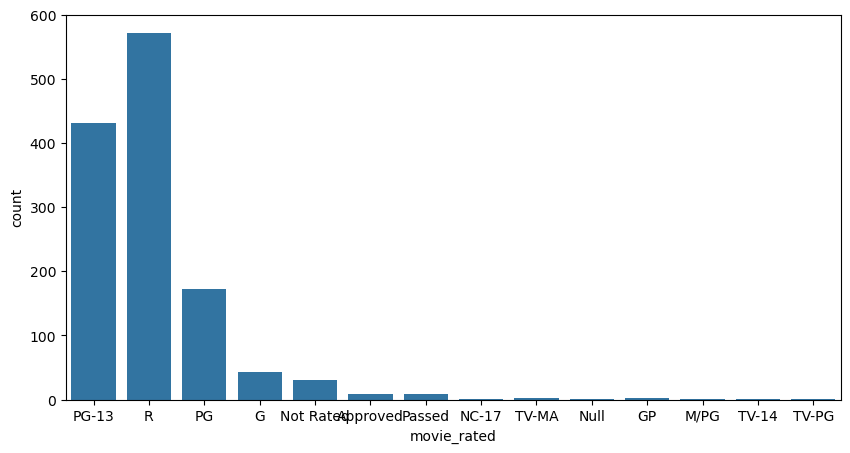

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(x =df['movie_rated'])
plt.show()

<Axes: xlabel='genres_count', ylabel='count'>

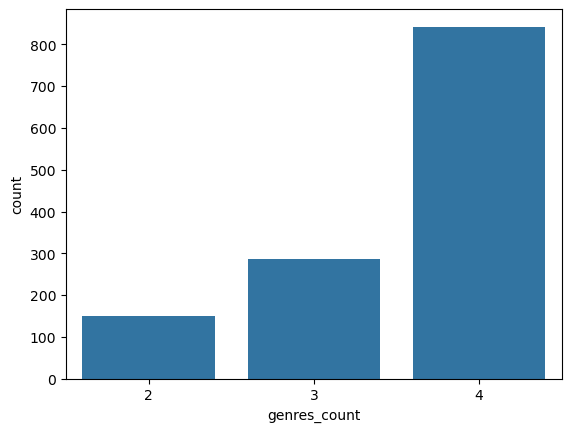

In [28]:
sns.countplot(x = df['genres_count'])

<Axes: xlabel='year', ylabel='Count'>

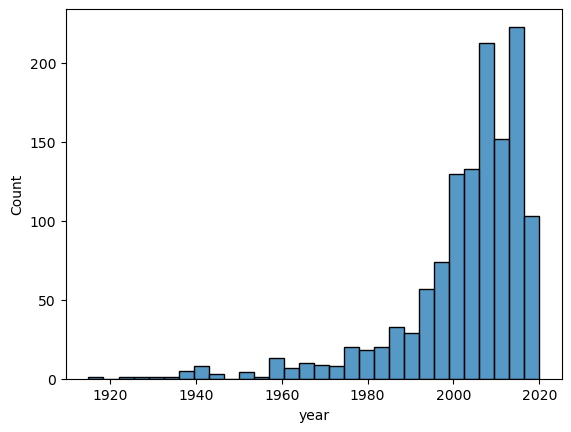

In [29]:
sns.histplot(df['year'] , bins=30)

<Axes: xlabel='rating', ylabel='run_length_minutes'>

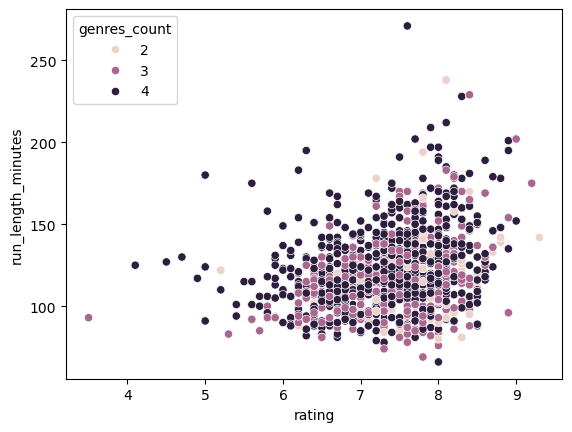

In [30]:
sns.scatterplot(y = df['run_length_minutes'] ,  x= df['rating'] , hue = df['genres_count'])

<Axes: xlabel='rating', ylabel='Density'>

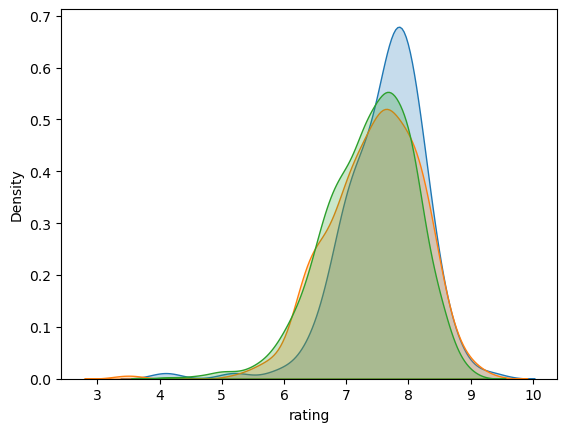

In [31]:
sns.kdeplot(x = df[df.genres_count == 2]['rating'] , fill = True)
sns.kdeplot(x = df[df.genres_count == 3]['rating'] , fill = True)
sns.kdeplot(x = df[df.genres_count == 4]['rating'] , fill = True)

In [32]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")
profile.to_notebook_iframe()  # For Jupyter Notebooks
profile.to_file("Movie.html")  # Save as HTML file

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]